In [1]:
# 📌 Step 1: Import required libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import pickle


2025-05-08 19:20:32.564654: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 19:20:32.621619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-08 19:20:32.623324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-08 19:20:32.625269: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-08 19:20:32.638437: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 19:20:32.639534: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
# 📌 Step 2: Load and preprocess the IMDB dataset
vocab_size = 10000  # Only top 10,000 words
maxlen = 200        # Limit reviews to 200 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(x_train.head())
print(y_train.head())

(25000, 200) (25000, 200)
(25000,) (25000,)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [10]:
# 📌 Step 3: Build the DNN model
model = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320545 (1.22 MB)
Trainable params: 320545 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 📌 Step 4: Add early stopping and train the model
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/20
40/40 [==============================] - 2s 26ms/step - loss: 0.6913 - accuracy: 0.6146 - val_loss: 0.6871 - val_accuracy: 0.6274
Epoch 2/20
40/40 [==============================] - 1s 21ms/step - loss: 0.6787 - accuracy: 0.7012 - val_loss: 0.6653 - val_accuracy: 0.7190
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6444 - accuracy: 0.7606 - val_loss: 0.6165 - val_accuracy: 0.7842
Epoch 4/20
40/40 [==============================] - 1s 19ms/step - loss: 0.5801 - accuracy: 0.8077 - val_loss: 0.5442 - val_accuracy: 0.8118
Epoch 5/20
40/40 [==============================] - 1s 30ms/step - loss: 0.4998 - accuracy: 0.8376 - val_loss: 0.4706 - val_accuracy: 0.8330
Epoch 6/20
40/40 [==============================] - 1s 31ms/step - loss: 0.4248 - accuracy: 0.8630 - val_loss: 0.4133 - val_accuracy: 0.8462
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.3674 - accuracy: 0.8752 - val_loss: 0.3730 - val_accuracy: 0.8600
Epoch 8/20
40

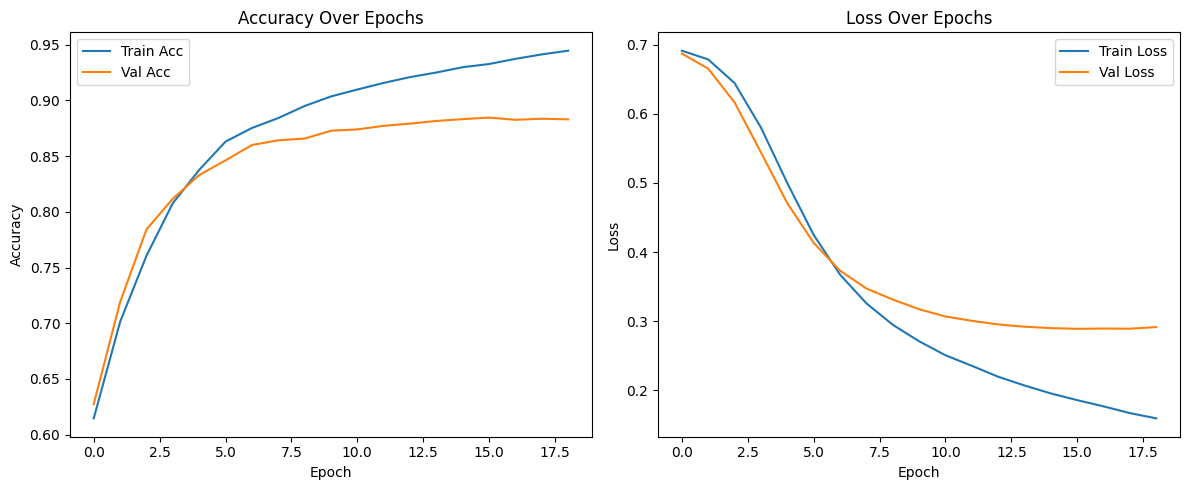

In [16]:
# 📌 Step 5: Visualize training history
def plot_history(hist):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [19]:
# 📌 Step 6: Evaluate on test data
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


782/782 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.8745
Test Accuracy: 0.8745


In [22]:
# 📌 Step 7: Save model in .h5 format
model.save("imdb_dnn_model.h5")


/root/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
# 📌 Step 8: Test with sample inputs
# Decode word index
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Sample input (positive review)
sample_index = 0
sample_review = x_test[sample_index]
predicted = model.predict(np.expand_dims(sample_review, axis=0))[0][0]
print("Review:\n", decode_review(imdb.load_data()[1][0][sample_index]))
print("\nPredicted Sentiment:", "Positive" if predicted >= 0.5 else "Negative")
print("Actual Label:", "Positive" if y_test[sample_index] == 1 else "Negative")

1/1 [==============================] - 0s 90ms/step
Review:
 ? please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss

Predicted Sentiment: Negative
Actual Label: Negative


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8365eab-db7b-47eb-a47e-443fcca51d5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>